In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from psycopg2 import sql
import psycopg2
import os
import matplotlib.pyplot as plt

In [2]:
from data_utils import load_data, preprocess_data
from sqlalchemy import create_engine
import os 
import pandas as pd

sales_data, price_data, competitor_data = load_data(from_date="2024-04-10")
df = preprocess_data(sales_data, price_data, competitor_data)

database_url = os.environ["DATABASE_URL"]
engine = create_engine(database_url)

competitor_data_query = """
    SELECT * FROM competitors
"""
competitors = pd.read_sql_query(competitor_data_query, engine)

competitor_data_query = """
    SELECT * FROM leaderboards
"""
leaderboard = pd.read_sql_query(competitor_data_query, engine)


## Sales

In [3]:
df.timestamp.max()

Timestamp('2024-04-12 17:06:21.584821')

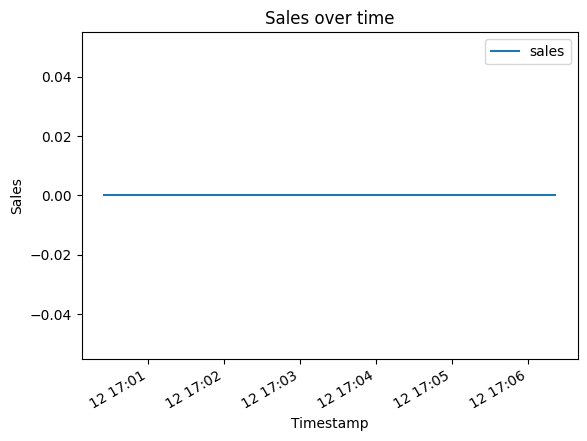

In [13]:
from figures import plot_total_sales

plot_total_sales(df.loc[lambda df: df.timestamp > "2024-04-12 17"])

## Competitor Prices

In [5]:
import plotly.express as px
# Group by 'competitor' and calculate average price
average_prices = competitor_data.sort_values('execution_time').groupby(['execution_time', 'competitor']).agg({'price': 'mean'}).reset_index()

# Plot using Plotly
fig = px.line(average_prices, x='execution_time', y='price', color='competitor', title='Average Price per Competitor over Time')
fig.update_xaxes(title='Competitor')
fig.update_yaxes(title='Average Price')
fig.show()

## Leaderboard

In [6]:
import plotly.express as px
# Group by 'competitor' and calculate average price
data_to_plot = leaderboard.sort_values('execution_time').melt(id_vars='execution_time', var_name='competitor', value_name='sales').reset_index(drop=True)

# Plot using Plotly
fig = px.line(data_to_plot, x='execution_time', y='sales', color='competitor', title='Leaderboard over time')
fig.show()

In [7]:
first_time = leaderboard.sort_values('execution_time').loc[lambda df: df.execution_time == df.execution_time.max()].values 
second_time = leaderboard.sort_values('execution_time').loc[lambda df: df.execution_time == "2024-04-05 18:00:02.598048"].values

first_time - second_time

array([[358000, 957000, 1049000, 1271000, 1114000,
        Timedelta('6 days 21:10:01.642496')]], dtype=object)

## Stock

In [8]:
import plotly.express as px
# Group by 'competitor' and calculate average price
df_to_plot = df.sort_values('execution_time').groupby('execution_time', as_index=False).agg(stock =('stock', 'sum'))

# Plot using Plotly
fig = px.line(df_to_plot, x='execution_time', y='stock')
fig.update_xaxes(title='Batch')
fig.update_yaxes(title='Stock')

fig.show()

## Hours until perished


<Axes: xlabel='hours_until_perished', ylabel='sales'>

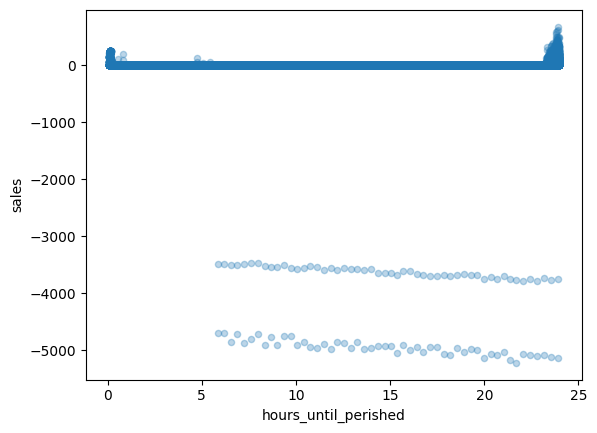

In [9]:
df.plot.scatter(x='hours_until_perished', y='sales', alpha=0.3)

In [10]:
df.agg()

TypeError: Must provide 'func' or tuples of '(column, aggfunc).